# Black Scholes Model of Pricing an Option Contract -- Himanshu Bhardwaj

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm

# Formula for a European call option

\begin{equation}
C(S, K, t, T, r, \sigma) = S_tN(d_1) - e^{-r(T-t)} K N(d_2) \\
where, \\
N(d) = \frac{1}{\sqrt(2\pi)}\int_{-\infty}^{d} e^{-\frac{1}{2}x^2}dx \\
d_1 = \frac{log(\frac{S_t}{K}) + (r+\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt(T-t)} \\
d_2 = \frac{log(\frac{S_t}{K}) + (r-\frac{\sigma^2}{2})(T-t)}{\sigma\sqrt(T-t)}
\end{equation}

In [50]:
sns.set()
def dN(x):
    '''probablity density function of normal distribution'''
    return math.exp(-0.5*x**2)/math.sqrt(2*math.pi)
def N(d):
    '''cumulative density function of normal distribution'''
    return norm.cdf(d)

In [3]:
def d1(St, K, t, T, r, sigma):
    d1 = (math.log(St/K) + (r + 0.5*sigma**2)*(T-t))/(sigma*math.sqrt(T-t))
    return d1

In [19]:
def d2(St, K, t, T, r, sigma):
    d2 = d1(St, K, t, T, r, sigma) - sigma*math.sqrt(T-t)
    return d2

In [15]:
def call_value(St, K, t, T, r, sigma):
    x1 = d1(St, K, t, T, r, sigma)
    x2 = d2(St, K, t, T, r, sigma)
    C = St*N(x1) - math.exp(-r*(T-t))*K*N(x2)
    return C

In [7]:
from datetime import datetime

In [41]:
St= 14834.35
K = 16300.0
t = 0.0
start = datetime(2021,4,9)
end = datetime(2021,6,10)
T = (end-start).days/365
r = 0.07
sigma = 0.273

In [42]:
call_value(St, K, t, T, r, sigma)

235.21160501601526

# Calculation of delta

**Delta:**
The delta value is the partial derivative of the option value w.r.t index level and is given by the following equation:
\begin{equation}
\Delta = \frac{\partial C}{\partial S} = N(d_{1})
\end{equation}
where N(d1)is the cummulative standard normal probability distribution 

In [44]:
def bsm_delta(St, K, t, T, r, sigma):
    d = d1(St, K, t, T, r, sigma)
    delta = N(d)
    return delta

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def plot_greeks(fun, St, K, t, T, r, sigma):
    tlist = np.linspace(0.01,0.99, 25)
    klist = np.linspace(13000,19000,50)
    V = np.zeros((len(tlist), len(klist)), dtype = np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i,j] = fun(St, klist[j],0.0, tlist[i], r, sigma)
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(12,5))
    ax = Axes3D(fig)
    ax.plot_surface(x,y,V, cmap='viridis', edgecolor=None)
    ax.set_ylabel('Maturity T')
    ax.set_xlabel('stike price')
    ax.set_zlabel('call value')
    plt.show()

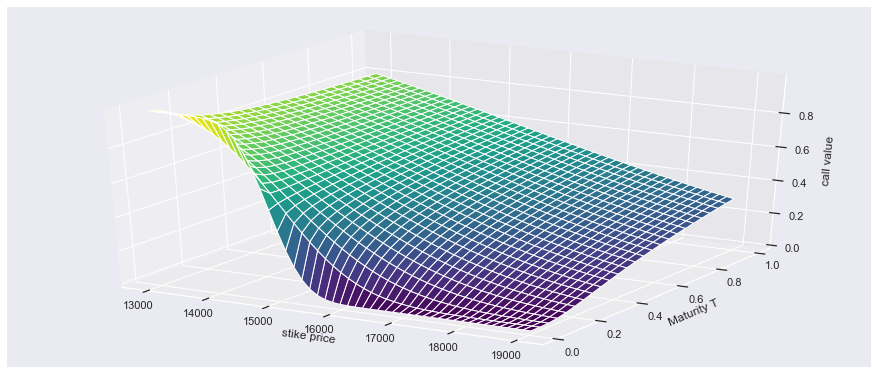

In [51]:
plot_greeks(bsm_delta, St, K, 0, 1, r, sigma)

# Calculation of Gamma

**Gamma:** The gamma value is the second partial derivative w.r.t. index level
\begin{equation}
\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{N'(d_1)}{S \sigma \sqrt(T-t)}
\end{equation}

In [54]:
def bsm_gamma(St, K, t, T, r, sigma):
    d = d1(St, K, t, T, r, sigma)
    gamma = dN(d)/(St*sigma*math.sqrt(T-t))
    return gamma

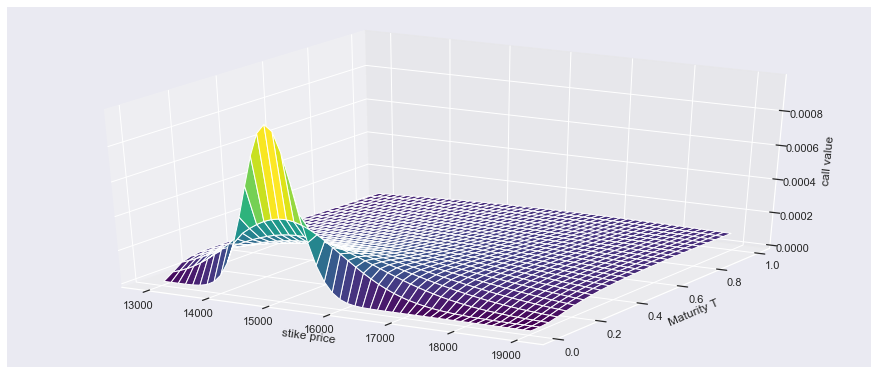

In [55]:
plot_greeks(bsm_gamma, St, K, 0, 1, r, sigma)

# Calculation of Theta

\begin{equation}
\Theta = -\frac{\partial C}{\partial t^*} = -\frac{SN'(d_{1})\sigma}{2\sqrt(T-t)} = -re^{-r(T-t)}KN(d_2)\\
where,  t^* = T-t
\end{equation}

In [57]:
def bsm_theta(St, K, t, T, r, sigma):
    d = d1(St, K, t, T, r, sigma)
    d2 = d - sigma*math.sqrt(T-t)
    theta = -(St*dN(d) * sigma/(2*math.sqrt(T-t))+r*K*math.exp(-r*(T-t))*N(d2))
    return theta

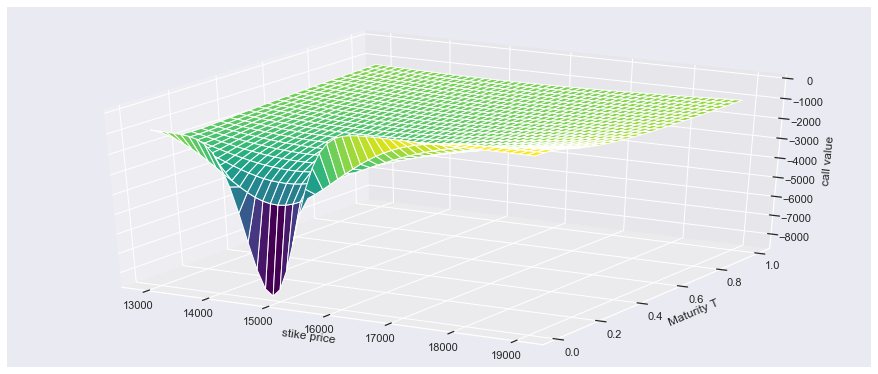

In [58]:
plot_greeks(bsm_theta, St, K, 0, 1, r, sigma)

# Calculation of Rho

\begin{equation}
\rho = \frac{\partial C}{\partial r} = K(T-t)e^{-r(T-t)}N(d_2)
\end{equation}

In [59]:
def bsm_rho(St, K, t, T, r, sigma):
    d = d1(St, K, t, T, r, sigma)
    dd = d2(St, K, t, T, r, sigma)
    rho = K*(T-t)*math.exp(-r*(T-t))*N(dd)
    return rho

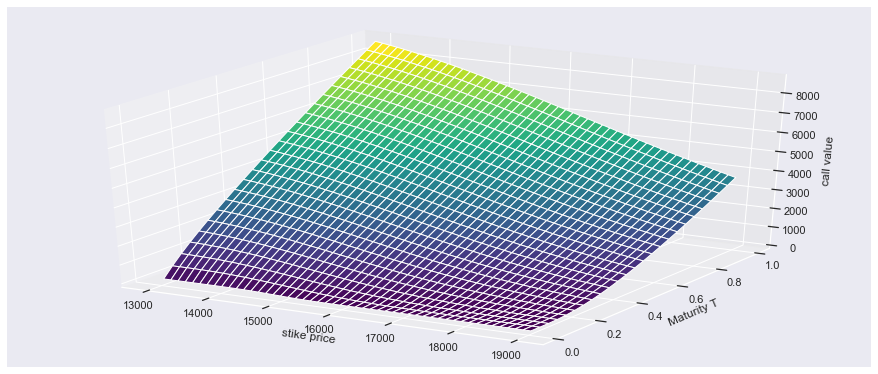

In [60]:
plot_greeks(bsm_rho, St, K, 0, 1, r, sigma)